## AI/ML Internship

#### Task 6: K-Nearest Neighbors (KNN) Classification

#### 1. Importing necessary Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#### 2. Load and preprocess the dataset

In [4]:
iris_data = pd.read_csv("Iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


iris_data.info()

In [7]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### 3. Split Features and Target variable

In [9]:
X = iris_data.drop(columns=["Id", "Species"])
y = iris_data["Species"]

#### 4. Normalize features

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train and Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### 5. KNN Classification

In [12]:
# Trying different values of K and record accuracy
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

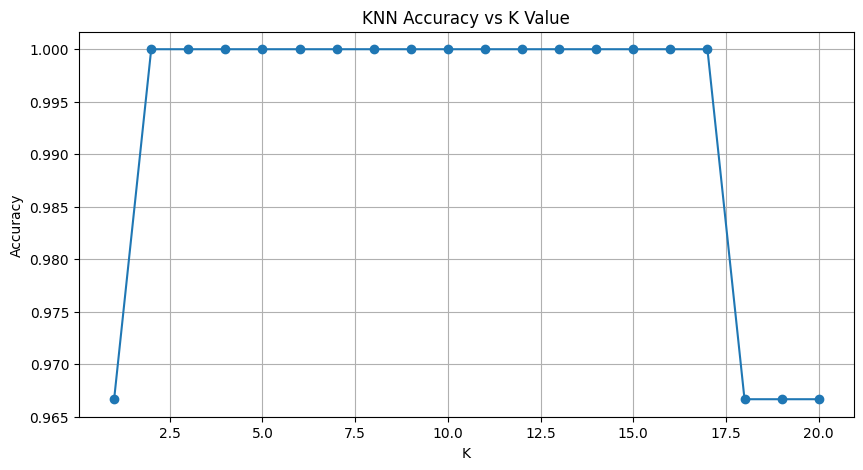

In [13]:
# Plot accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [14]:
# Best K and final model
best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)

Best K: 2


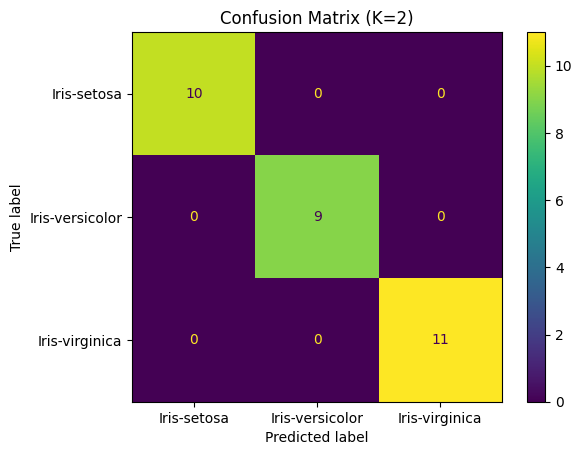

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_final_pred, labels=knn_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_final.classes_)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

### Conclusion

**In this task, we applied the K-Nearest Neighbors (KNN) algorithm to the Iris dataset to predict flower species by their sepal and petal measurements. We normalized the features and divided data into training and testing sets before training KNN models with different values of K and testing their performance with accuracy scores. The best value of K was chosen by selecting the highest accuracy, and the final model showed good classification performance. We also tested the model with a confusion matrix to ensure its accuracy in differentiating various iris species. This helped demonstrate how KNN utilizes distance-based similarity in classification and how one needs to adjust K for best results.**